In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


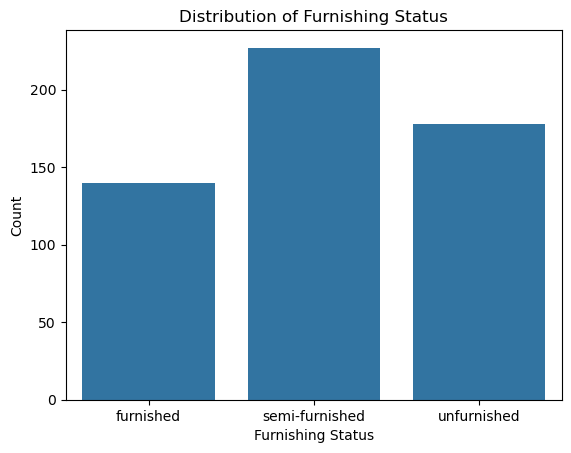

In [7]:
sns.countplot(x='furnishingstatus',data=data)
plt.title('Distribution of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

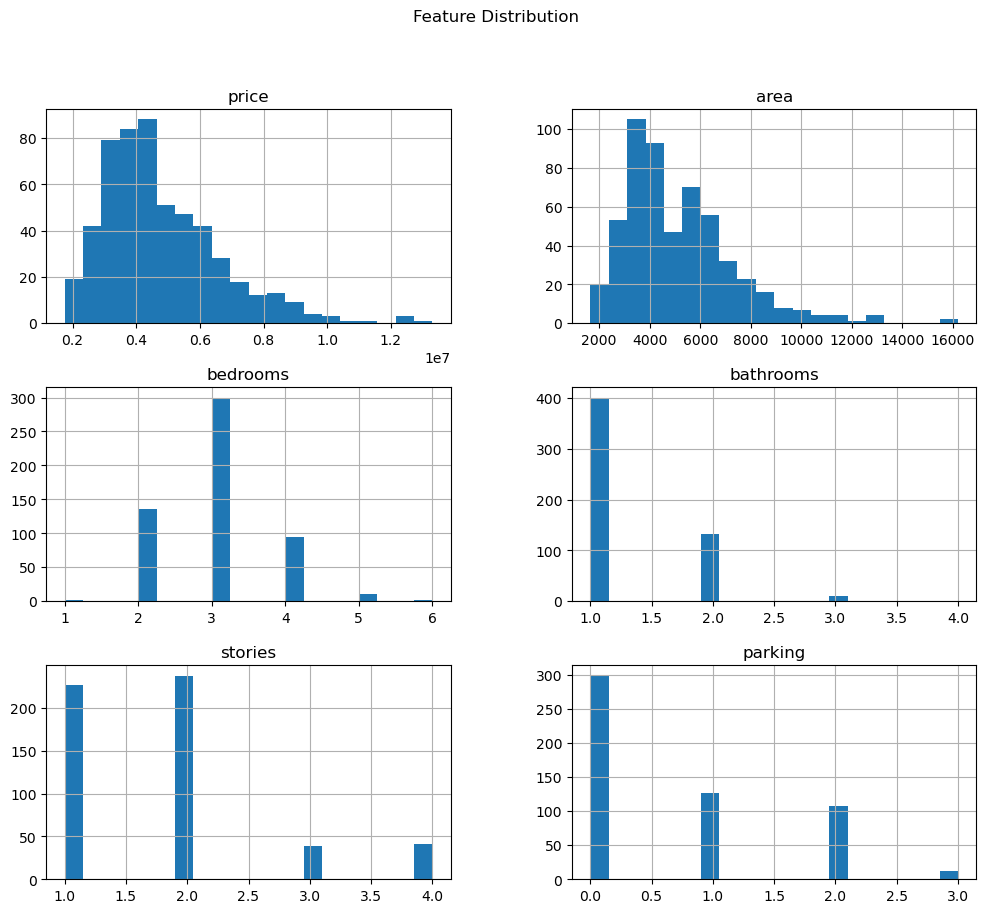

In [8]:
data.hist(figsize=(12,10),bins=20)
plt.suptitle("Feature Distribution")
plt.show()

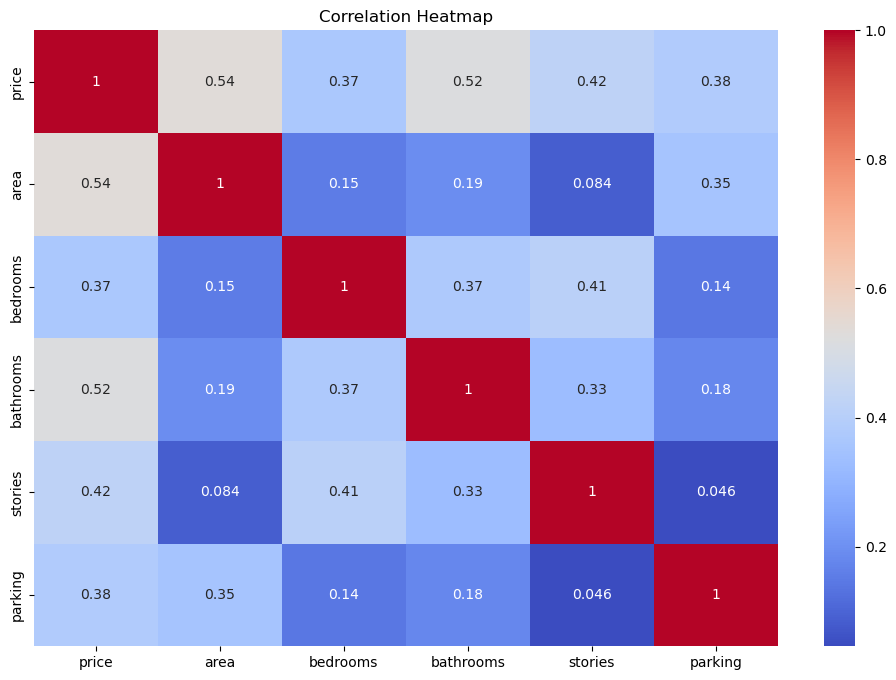

In [9]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
#Copy original data for future reference
original_data=data.copy()

### Encoding Logistic Target Variable

In [12]:
label_encoder = LabelEncoder()
data['furnishingstatus'] = label_encoder.fit_transform(data['furnishingstatus'])

# Display the updated data
print("\nUpdated data with encoded furnishingstatus:")
print(data)


Updated data with encoded furnishingstatus:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes      

In [13]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = ['area']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

In [14]:
scaler2 = StandardScaler()
scaled_features2 = ['price']
data[scaled_features2] = scaler.fit_transform(data[scaled_features2])

In [15]:
#This scaling transforms the numerical data so that the mean is 0 and the standard deviation is 1. 
#The previously large scale of the numbers was influencing our model and causing large MSE and MAE.

In [16]:
data['area']

0      1.046726
1      1.757010
2      2.218232
3      1.083624
4      1.046726
         ...   
540   -0.991879
541   -1.268613
542   -0.705921
543   -1.033389
544   -0.599839
Name: area, Length: 545, dtype: float64

In [17]:
data['price']

0      4.566365
1      4.004484
2      4.004484
3      3.985755
4      3.554979
         ...   
540   -1.576868
541   -1.605149
542   -1.614327
543   -1.614327
544   -1.614327
Name: price, Length: 545, dtype: float64

# Regressions Using 80/20 split with all variables

In [19]:
# Separate features and target for classification and regression
x_class = data.drop('furnishingstatus', axis=1)
y_class = data['furnishingstatus']

x_reg = data.drop('price', axis=1)
y_reg = data['price']

# Use pd.get_dummies to one-hot encode all categorical variables for classification
x_class_encoded = pd.get_dummies(x_class, drop_first=True)

# Use pd.get_dummies to one-hot encode all categorical variables for regression
x_reg_encoded = pd.get_dummies(x_reg, drop_first=True)

# Split data into training and testing sets for both tasks
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class_encoded, y_class, test_size=0.20, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg_encoded, y_reg, test_size=0.20, random_state=42)

### Linear Regression

In [21]:
# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train_reg, y_train_reg)

# Predictions and Evaluation
y_pred_reg = regressor.predict(x_test_reg)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Linear Regression Results:
Mean Squared Error: 0.5073561548750561
Mean Absolute Error: 0.5242509357450866
R2 Score: 0.6494754192267793


#### Some Prediction Tests

In [23]:
#Takes random sample(row) and stores in variable
prediction_test=x_test_reg.sample()
print(prediction_test)

         area  bedrooms  bathrooms  stories  parking  furnishingstatus  \
305 -0.784329         3          1        2        1                 1   

     mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
305          True          False         False                False   

     airconditioning_yes  prefarea_yes  
305                False         False  


In [24]:
#Stores index(row number) into variable to call later
index=prediction_test.index[0]

In [25]:
#Shows all informed in scaled data for sample index(row number)
data.loc[index]

price              -0.307017
area               -0.784329
bedrooms                   3
bathrooms                  1
stories                    2
mainroad                 yes
guestroom                 no
basement                  no
hotwaterheating           no
airconditioning           no
parking                    1
prefarea                  no
furnishingstatus           1
Name: 305, dtype: object

In [26]:
#Unscaled prediction so that we can compare to original data
scaled_output=regressor.predict(prediction_test)
scaled_output_reshaped = scaled_output.reshape(-1, 1)
unscaled_output = scaler.inverse_transform(scaled_output_reshaped)
print("Unscaled Data:", unscaled_output)

Unscaled Data: [[3634231.99215349]]


In [28]:
#Pulls observed price from the original, unscaled data for comparison
original_data_check=original_data['price']
original_data_check.loc[index]

4193000

### Logistic Regression

              precision    recall  f1-score   support

           0       0.17      0.38      0.24        13
           1       0.74      0.48      0.58        61
           2       0.56      0.66      0.61        35

    accuracy                           0.52       109
   macro avg       0.49      0.51      0.47       109
weighted avg       0.62      0.52      0.55       109



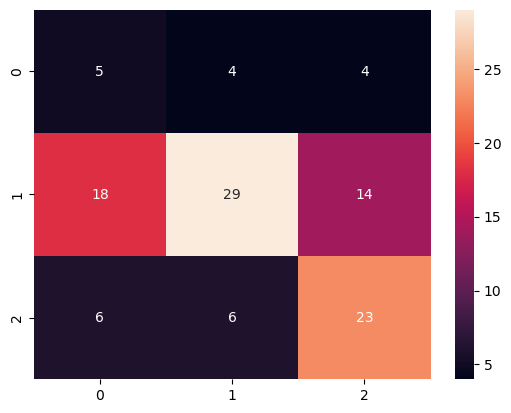

In [87]:
# Initialize and train the Logistic Regression model
classification=LogisticRegression(max_iter=1000)
classification.fit(x_train_class,y_train_class)

# Predictions and Evaluation
y_pred_class=classification.predict(x_test_class)
conf_matrix=confusion_matrix(y_pred_class,y_test_class)
sns.heatmap(conf_matrix,annot=True)

print(classification_report(y_pred_class,y_test_class))

# Regression with 70/30 split using all variables

In [95]:
# Separate features and target for classification and regression
x_class = data.drop('furnishingstatus', axis=1)
y_class = data['furnishingstatus']

x_reg = data.drop('price', axis=1)
y_reg = data['price']

# Use pd.get_dummies to one-hot encode all categorical variables for classification
x_class_encoded = pd.get_dummies(x_class, drop_first=True)

# Use pd.get_dummies to one-hot encode all categorical variables for regression
x_reg_encoded = pd.get_dummies(x_reg, drop_first=True)

# Split data into training and testing sets for both tasks
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class_encoded, y_class, test_size=0.30, random_state=50)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg_encoded, y_reg, test_size=0.30, random_state=50)

### Linear Regression

In [97]:
# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train_reg, y_train_reg)

# Predictions and Evaluation
y_pred_reg = regressor.predict(x_test_reg)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Linear Regression Results:
Mean Squared Error: 0.31766699502739854
Mean Absolute Error: 0.43141090570406987
R2 Score: 0.6907993785085307


### Logistic Regression

              precision    recall  f1-score   support

           0       0.26      0.37      0.31        27
           1       0.69      0.43      0.53        97
           2       0.37      0.60      0.46        40

    accuracy                           0.46       164
   macro avg       0.44      0.47      0.43       164
weighted avg       0.54      0.46      0.48       164



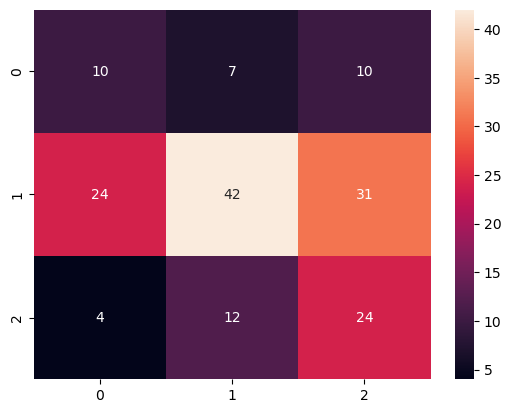

In [99]:
# Initialize and train the Logistic Regression model
classification=LogisticRegression(max_iter=1000)
classification.fit(x_train_class,y_train_class)

# Predictions and Evaluation
y_pred_class=classification.predict(x_test_class)
conf_matrix=confusion_matrix(y_pred_class,y_test_class)
sns.heatmap(conf_matrix,annot=True)

print(classification_report(y_pred_class,y_test_class))

#  Regression Using Select Columns Only

### Heatmap to find correlated columns

Text(0.5, 1.0, 'Correlation Heatmap')

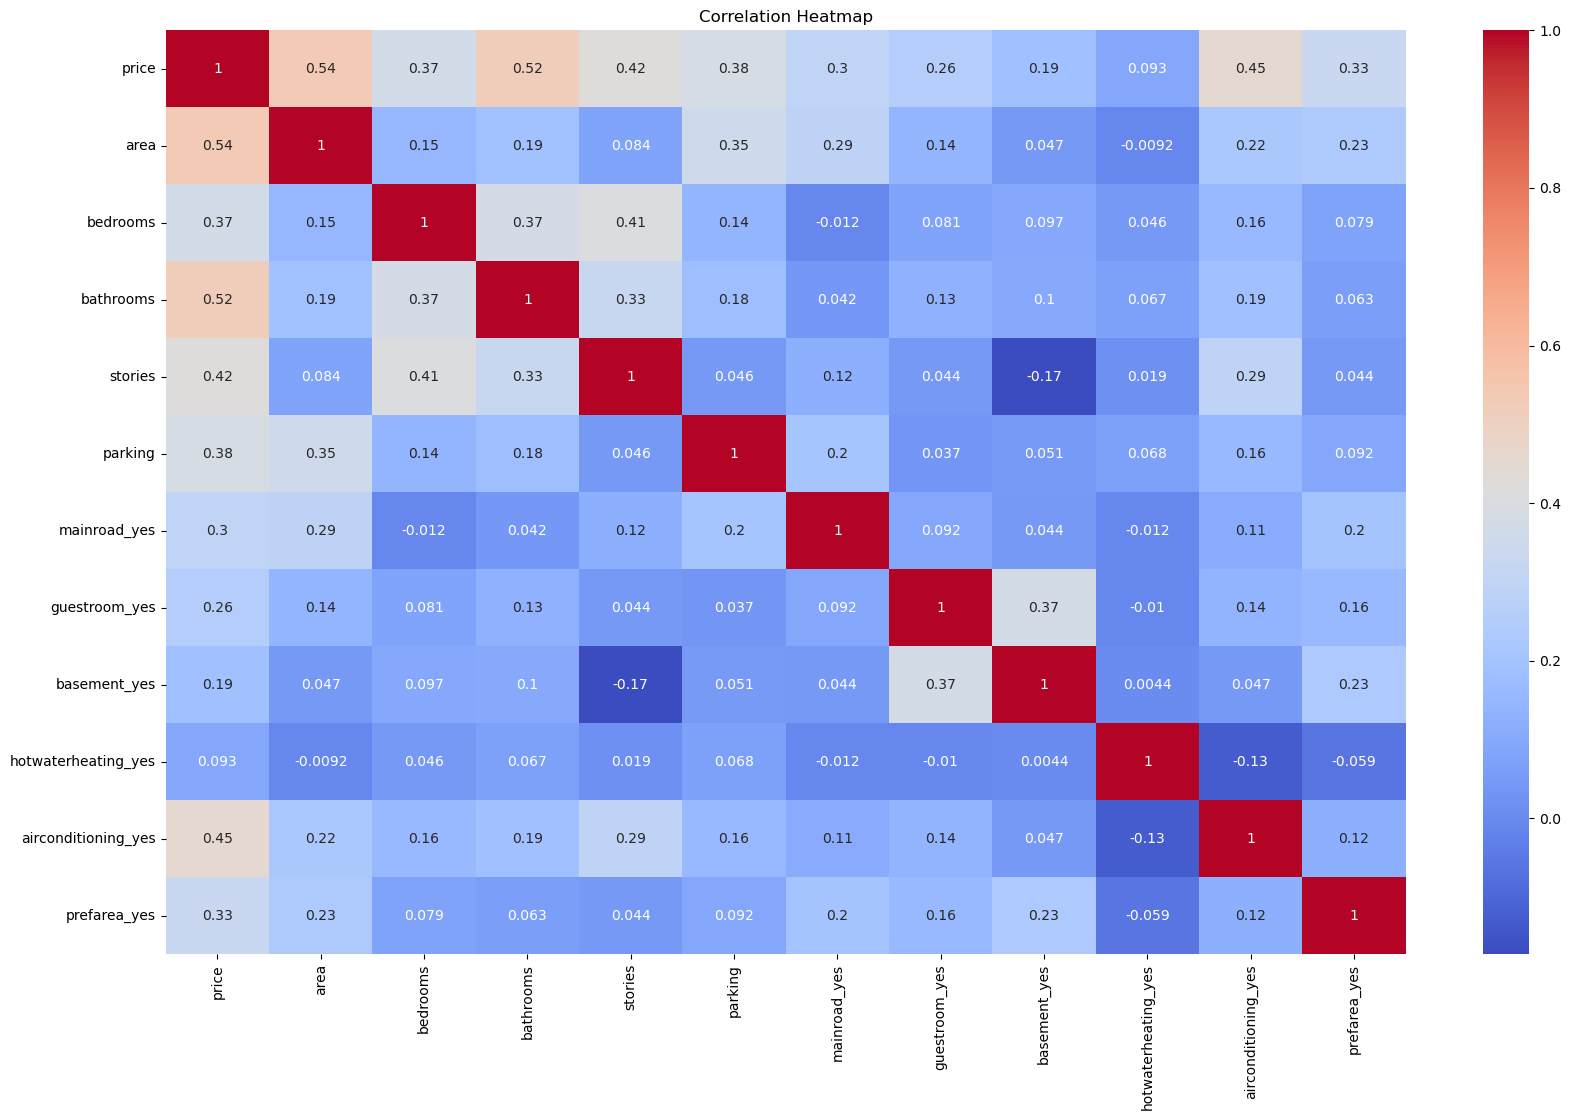

In [101]:
numeric_data = x_class_encoded
plt.figure(figsize=(20, 12))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

### Grabbing Only Columns with Some Correlation

In [103]:
x_class_encoded_new = x_class_encoded.drop(['mainroad_yes', 'guestroom_yes', 'basement_yes', 
                                            'hotwaterheating_yes', 'prefarea_yes'], axis=1)
x_reg_encoded_new = x_reg_encoded.drop(['mainroad_yes', 'guestroom_yes', 'basement_yes', 
                                            'hotwaterheating_yes', 'prefarea_yes'], axis=1)

In [105]:
x_reg_encoded_new.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,airconditioning_yes
0,1.046726,4,2,3,2,0,True
1,1.757010,4,4,4,3,0,True
2,2.218232,3,2,2,2,1,False
3,1.083624,4,2,2,3,0,True
4,1.046726,4,1,2,2,0,True


In [107]:
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(x_class_encoded_new, y_class, test_size=0.20, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x_reg_encoded_new, y_reg, test_size=0.20, random_state=42)

### Linear Regression

In [109]:
# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train_reg, y_train_reg)

# Predictions and Evaluation
y_pred_reg = regressor.predict(x_test_reg)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Linear Regression Results:
Mean Squared Error: 0.5850523955246136
Mean Absolute Error: 0.5743598644959598
R2 Score: 0.5957962790022002


### Logistic Regression

              precision    recall  f1-score   support

           0       0.17      0.38      0.24        13
           1       0.74      0.48      0.58        61
           2       0.56      0.66      0.61        35

    accuracy                           0.52       109
   macro avg       0.49      0.51      0.47       109
weighted avg       0.62      0.52      0.55       109



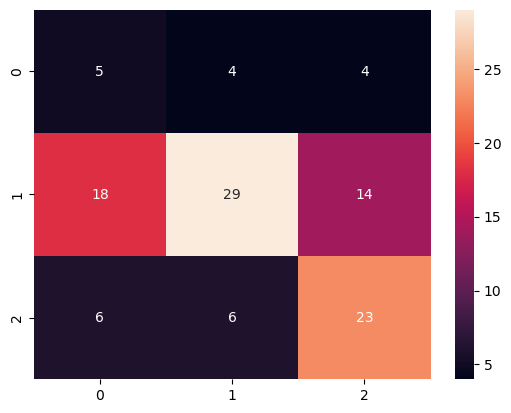

In [111]:
# Initialize and train the Logistic Regression model
classification=LogisticRegression(max_iter=1000)
classification.fit(x_train_class,y_train_class)

# Predictions and Evaluation
y_pred_class=classification.predict(x_test_class)
conf_matrix=confusion_matrix(y_pred_class,y_test_class)
sns.heatmap(conf_matrix,annot=True)

print(classification_report(y_pred_class,y_test_class))

## Summary of Results

Linear Regression Results

MSE (Mean Squared Error): Measures the average squared difference between predicted and actual values. A lower value indicates better accuracy, although it’s influenced by the scale of the data.
- Our MSE: The MSE value is 0.507. While this is lower than in previous iterations, it still indicates some level of error. The scale of the target variable might influence this value, but this is a more manageable MSE compared to higher values seen previously.

MAE (Mean Absolute Error): Measures the average absolute difference between predictions and actual values. It provides insight into the typical size of errors, expressed in the same units as the target variable.
- Our MAE: The MAE value is 0.524, indicating that, on average, the model’s predictions are off by 0.524 units. While this is an improvement compared to earlier results, there’s still room for improvement in reducing this error, particularly for more accurate predictions.

R² Score (Coefficient of Determination):Measures how well the model explains the variability of the target variable. A higher score indicates better model performance in explaining the data.
- Our R²: The R² score is 0.649, which means the model explains approximately 65% of the variance in the data. This is a decent score, suggesting that the model captures a significant portion of the variation, but there's still around 35% of the variance that the model doesn't account for. This unaccounted-for variance likely contributes to the remaining error (MSE and MAE).

Overall Assessment:
While the model shows moderate performance with an R² score of about 65%, the MSE and MAE values indicate there’s still significant room for improvement. A lower MSE and MAE would be ideal for a more accurate model, so future efforts should focus on reducing these errors. Fine-tuning the model, improving feature selection, or exploring more advanced regression techniques could potentially help improve these metrics.

Logistic Regression Results

Summary of the Confusion Matrix:

Class 0:
- 10 correct predictions (diagonal).
- Misclassified as Class 1: 7 times.
- Misclassified as Class 2: 10 times.
- Issue: Class 0 is not well predicted, as it has a very low recall and high misclassification. The model struggles to correctly identify instances of Class 0.

Class 1:
- 42 correct predictions (diagonal).
- Misclassified as Class 0: 24 times.
- Misclassified as Class 2: 31 times.
- Observation: Class 1 is the best predicted class, but there are still notable misclassifications, particularly as Class 0 and - Class 2. This suggests some confusion between Class 1 and the other two classes.

Class 2:
- 24 correct predictions (diagonal).
- Misclassified as Class 0: 4 times.
- Misclassified as Class 1: 12 times.
- Issue: Class 2 also has significant misclassification. It is often confused with Class 1 and sometimes with Class 0, suggesting that the model is not distinguishing Class 2 well.




Precision: Proportion of correct positive predictions for each class.
- For class 0: 21% of predicted "0"s are correct.
- For class 1: 74% of predicted "1"s are correct.
- For class 2: 49% of predicted "2"s are correct.

Recall: Proportion of actual positives correctly identified by the model.
- For class 0: 46% of actual "0"s are correctly predicted.
- For class 1: 47% of actual "1"s are correctly predicted.
- For class 2: 59% of actual "2"s are correctly predicted.

F1-Score: Harmonic mean of precision and recall. It balances the two metrics and is useful when classes are imbalanced.
- For class 0: 0.29 (low due to low precision).
- For class 1: 0.57 (moderate balance of precision and recall).
- For class 2: 0.53 (moderate balance as well).

Accuracy: The overall proportion of correct predictions (0.50 or 50%), meaning the model is correct half of the time.

Macro avg: Average performance across all classes, treating each class equally (precision: 0.48, recall: 0.51, F1: 0.46).

Weighted avg: Performance average weighted by the number of instances in each class, which gives more importance to classes with more samples (precision: 0.60, recall: 0.50, F1: 0.53).

Key Takeaways:
The model has low precision for class 0, meaning it often predicts "0" incorrectly.
The model's recall is balanced across classes, but performance on class 1 and class 0 is subpar.
Overall, accuracy is 50%, suggesting room for improvement, especially for class 0.